Bbox(x0=0.125, y0=0.43588235294117644, x1=0.9, y1=0.88)


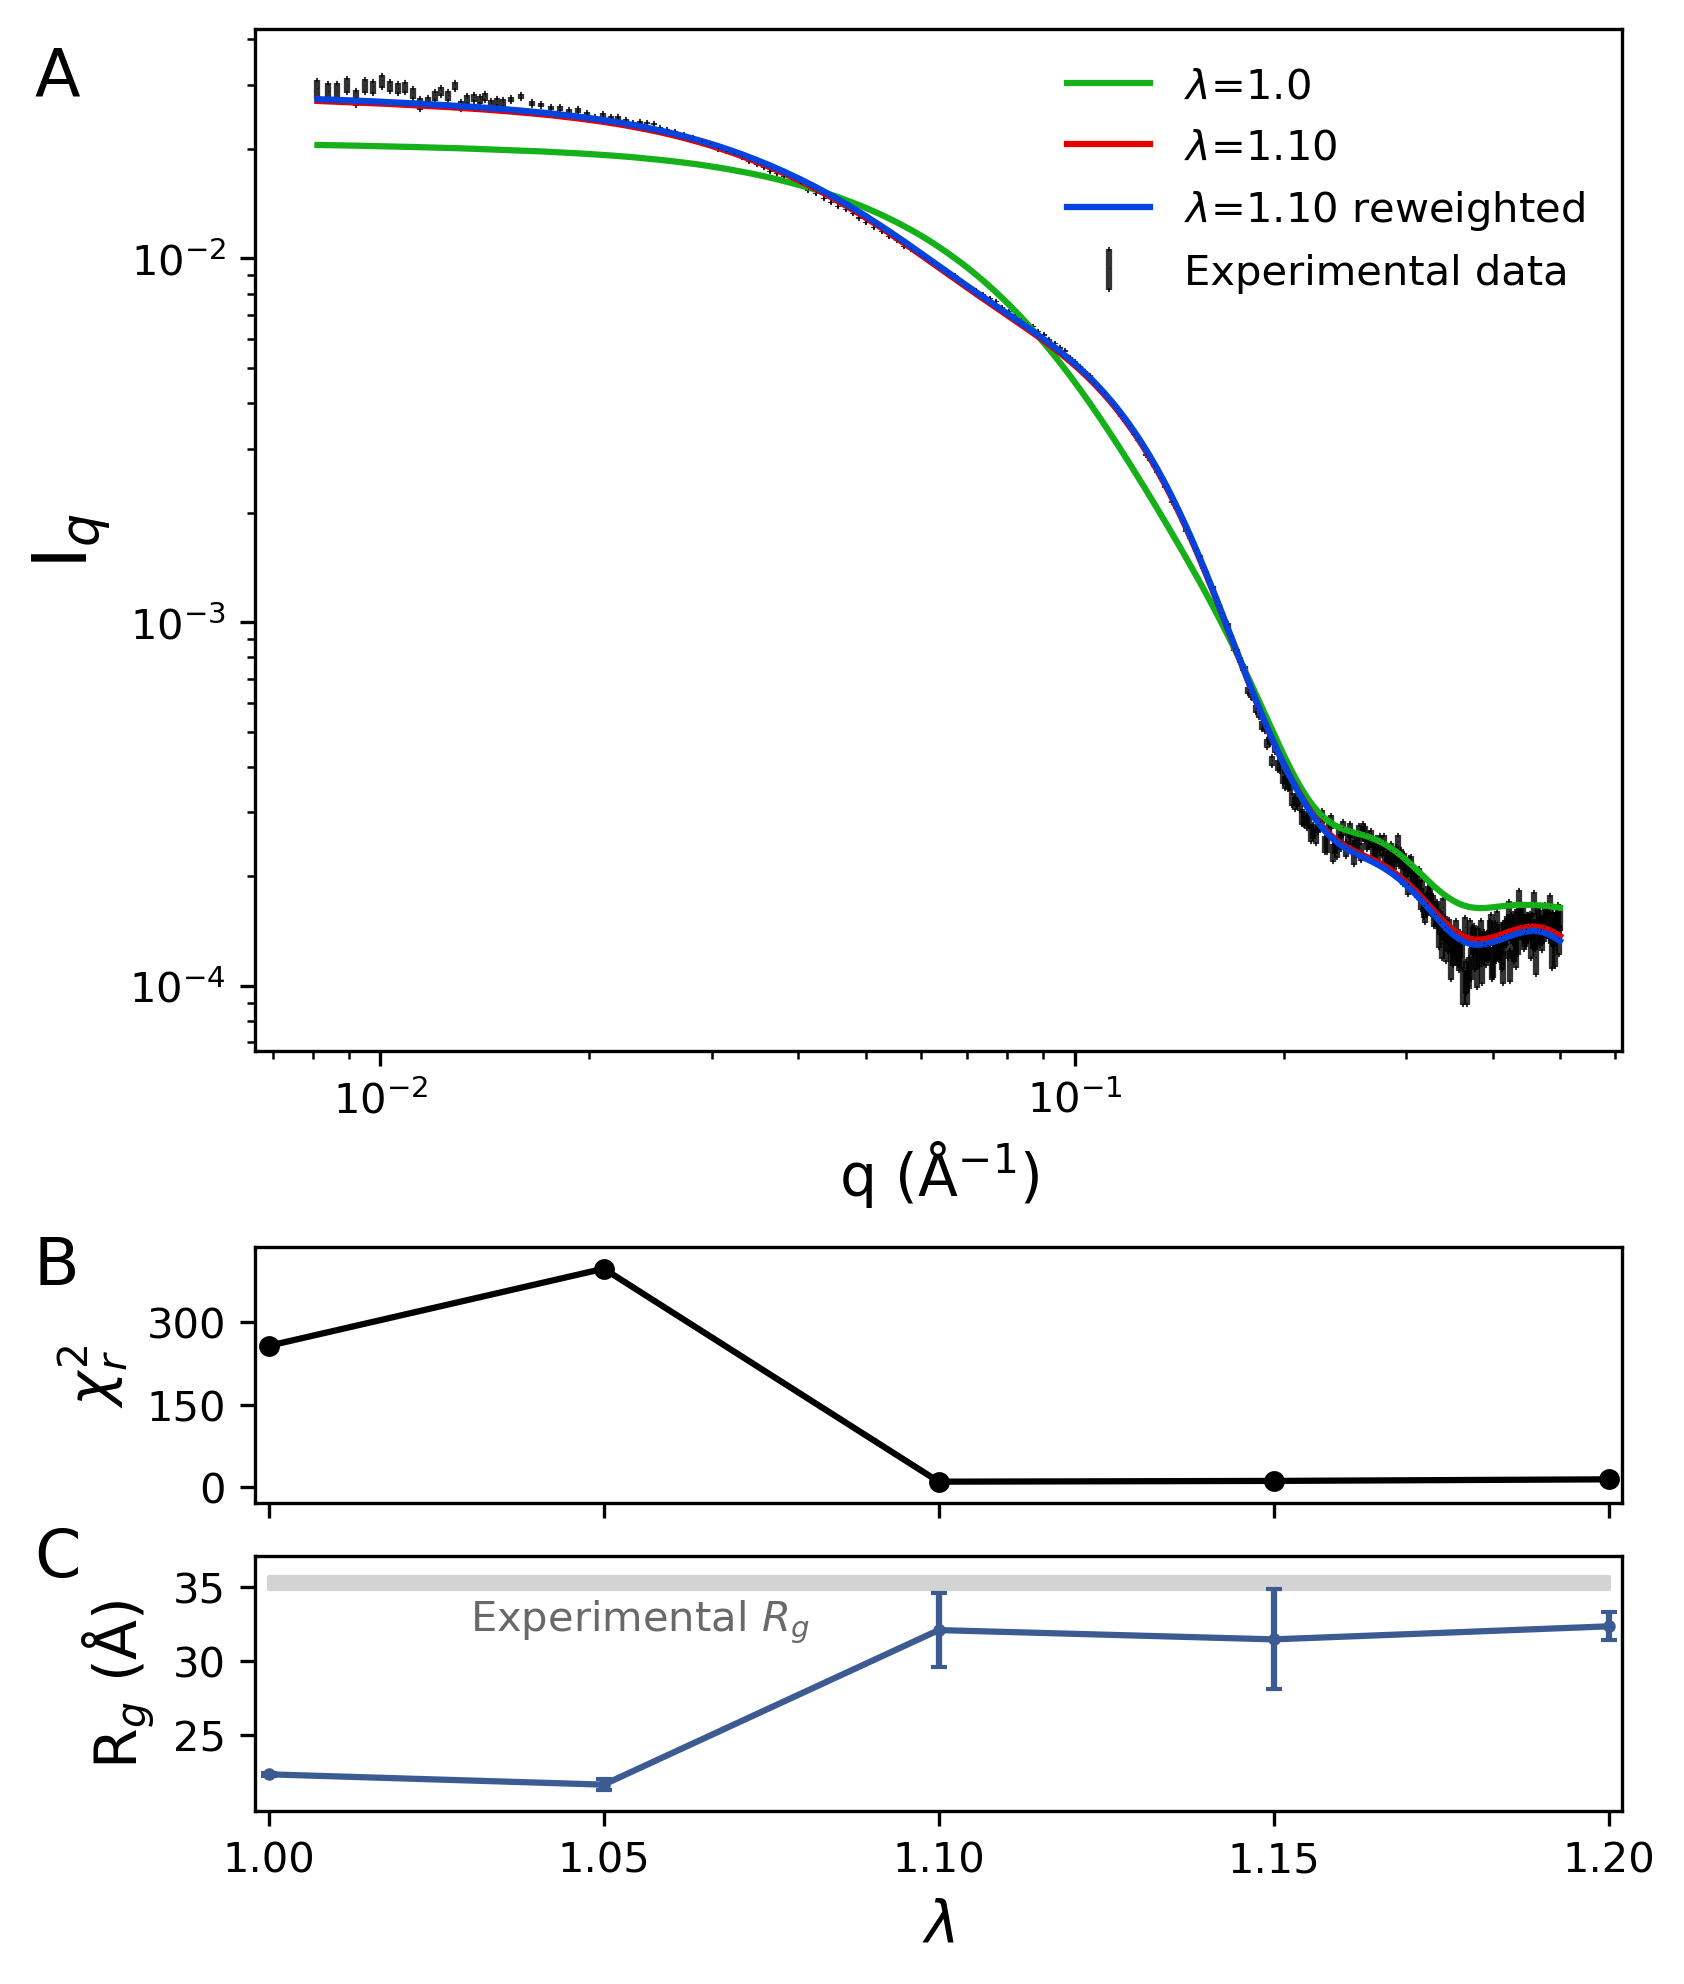

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns #https://xkcd.com/color/rgb/
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec


file_list = ['data_WT_saxs_1.0.dat','data_WT_saxs_1.10.dat']

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["red"]
c3 = sns.xkcd_rgb["sky blue"]
c4 = sns.xkcd_rgb["green"]
c5 = sns.xkcd_rgb["orange"]
c6 = sns.xkcd_rgb["blue"]
c7 = sns.xkcd_rgb["denim blue"]
color_list = [c1,c2,c3,c4,c5,c6]

fig, ax = plt.subplots(nrows=3, ncols=1, dpi=300,figsize=(5.5,6.5), gridspec_kw=dict(height_ratios=[2,0.5,0.5],hspace=0.2),constrained_layout=True)


#plot saxs fitting
data = np.loadtxt(file_list[0])
x = data[:,0]
avg_exp = data[:,1]
sigma_exp = data[:,2]
avg_calc = data[:,3]

ax[0].errorbar(x, avg_exp,yerr=sigma_exp,fmt=',', capsize=0.2, color=c1,alpha=0.8,label='Experimental data')
ax[0].plot(x, avg_calc,color=c4,label=r'$\lambda$=1.0')

data = np.loadtxt(file_list[1])
avg_calc = data[:,3]
avg_calc_rew = data[:,4]
ax[0].plot(x, avg_calc,color=c2,label=r'$\lambda$=1.10')
ax[0].plot(x, avg_calc_rew,color=c6,label=r'$\lambda$=1.10 reweighted')

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax.set_ylim(0,1.05)
#ax.set_xlim(0.,150.)
ax[0].set_ylabel(r'I$_{q}$', fontsize=18)
ax[0].set_xlabel(r'q (Å$^{-1}$)', fontsize=14)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend(frameon=False)

#plot PW-rescaling assessment


SAXS_rg = np.zeros(5) + 35.3
SAXS_rg_error = np.zeros(5) + 0.4
thetas = np.array([1.0, 1.05, 1.10,1.15, 1.20])
M3_rg =np.array([2.233577, 2.163699, 3.209806, 3.146887, 3.235164 ])*10
M3_rg_err =np.array([0.009194, 0.035357, 0.252614, 0.338387, 0.094529 ])*10
M3_chi2 = np.array([256.25,395.87,10.52,11.90,14.76])
ax[1].plot(thetas, M3_chi2, marker='o', markersize=4, color='k', label='M3_chi2')
ax[1].set_ylabel(r'$\chi^{2}_{r}$', weight='bold', fontsize=14)
ax[1].set_yticks([0.0,150.0,300.0])
ax[1].set_xticks(thetas)

#trick to hide labels in ax[1]
labels = [item.get_text() for item in ax[1].get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax[1].set_xticklabels(empty_string_labels)
ax[1].margins(x=0.01,y=0.1)
#ax[2].plot(thetas, SAXS_rg, color='black', label='SAXS')
ax[2].fill_between(thetas, SAXS_rg-SAXS_rg_error, SAXS_rg+SAXS_rg_error, color='lightgrey')
ax[2].errorbar(thetas, M3_rg, yerr=M3_rg_err, marker='o', markersize=2, capsize=2, color=c7)
ax[2].set_xlabel(r'$\lambda$', fontsize=14)
ax[2].set_ylabel(r'R$_{g}$ (Å)', fontsize=14)
ax[2].set_xticks([1.0,1.05,1.10,1.15,1.20])
ax[2].set_yticks([25.0,30.0,35.0,40.0])
ax[2].margins(x=0.01,y=0.1)
ax[2].text(1.03,32,'Experimental $R_g$', color='dimgray', fontfamily='sans-serif')
print(ax[0].get_position())
fig.text(0.01, 0.96, 'A', fontsize=16, fontfamily='sans-serif')
fig.text(0.01, 0.35, 'B', fontsize=16, fontfamily='sans-serif')
fig.text(0.01, 0.20, 'C', fontsize=16, fontfamily='sans-serif')

plt.savefig('fitting-plots.png')
plt.show()


In [53]:
rg = np.loadtxt('../../simulations/CelS2/LPMO_theta1.10/rg.xvg', comments=('@', '#'), usecols=(1))[:-1]
w = np.loadtxt('../../Copenhagen/WT_CelS2_BME_2/WT_saxs_1.10_2.weights.dat', usecols=(1))

In [54]:
mu = sum(rg*w)
N = len(w)
std = (sum(w*(rg-mu)**2)/sum(w))**0.5

In [55]:
mu

3.2422631010333727

In [56]:
std

0.5677188354243281

In [58]:
np.argmax(w)

1043

In [62]:
for i in np.argsort(w)[::-1]:
    print(i+1)

1044
1017
1043
1041
1045
1714
1632
1512
1629
590
968
343
1785
1014
1715
1716
1039
3567
3461
1728
1018
1627
1608
1631
1542
342
3557
1623
2773
1695
554
1711
893
1628
1795
284
551
1449
297
558
1047
1722
3643
1016
1441
1654
3576
1002
3060
3239
3250
967
637
969
3489
3712
1001
3431
3579
1729
1626
1725
1493
1587
1511
1036
1724
1900
257
3218
3453
1129
3710
1620
3610
3605
3495
3504
1787
3454
2770
2811
1046
1624
3408
751
486
2772
1490
3414
3460
1630
1708
3525
4258
3465
1609
933
1621
3263
1703
1048
1791
3419
661
3257
3544
663
3365
1019
2232
1635
745
241
1030
1619
1274
1634
618
3552
3240
1588
3553
3603
5956
1710
3458
1894
3214
3623
3714
585
904
1719
3292
1647
1611
1508
1707
1734
1618
3713
2238
6192
885
552
2629
3612
645
1126
3606
1899
1585
469
3688
3215
1139
1034
1031
557
319
3456
3578
3715
3588
3692
611
669
1035
2639
572
3668
571
1128
581
642
3542
1040
1693
3486
3607
1270
668
653
559
1037
3514
3587
3568
2832
3709
545
306
1015
855
2812
1042
946
142
5542
296
1633
1543
3669
3733
3693
1739
1028
4259
